# Machine Learning Online Class - Exercise 1: Linear Regression

In [1]:
%matplotlib inline 
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_2/ex1/'
sys.path.append(path_to_modules)

from plotData import plotData
from computeCost import computeCost
from gradientDescent import gradientDescent
from warmUpExercise import warmUpExercise

import numpy as np
import matplotlib.pyplot as plt

## Part 1: Basic Function

In [2]:
print("Running warmUpExercise ... \n")
print("5x5 Identity Matrix: \n")
print(warmUpExercise())

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## Part 2: Plotting

Plotting Data ...



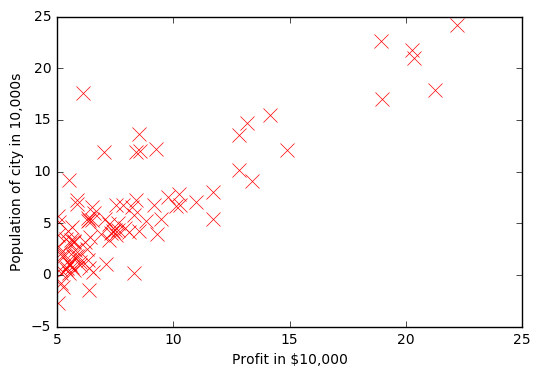

In [3]:
print("Plotting Data ...\n")
data = np.loadtxt(path_to_modules + 'ex1data1.txt', delimiter =",")

X = data[:, 0] #x refers to the population size in 10,000s
y = data[:, 1] #y refers to the profit in $10,000s

m = y.size #umber of training examples

y = y.reshape((m,1))

#Plot Data

training_data_plot,= plotData(X, y)
plt.show(block=False)

## Part 3: Cost and Gradient descent


Testing the cost function ...

With theta = [0  0]
Cost computed =  32.0727338775 

Expected cost value (approx) 32.07


With theta = [-1  2]
Cost computed =  54.242455082 

Expected cost value (approx) 54.24


Running Gradient Descent ...

theta before for (2, 1)
Theta found by gradient descent:


 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




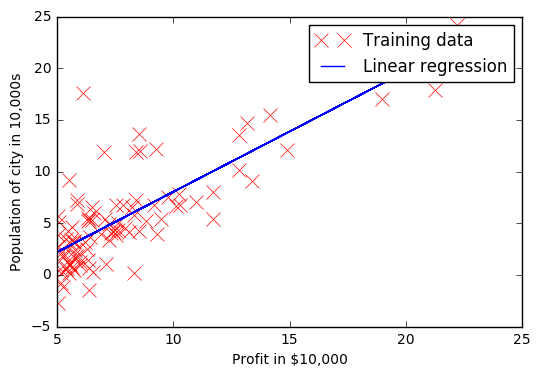

For population = 35,000, we predict a profit of f
 [[ 4519.7678677]]
For population = 70,000, we predict a profit of f
 [[ 45342.45012945]]


In [4]:
X = np.c_[np.ones((m, 1)), X] # Add a column of ones to x
theta = np.zeros((2, 1)) #initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

print("\nTesting the cost function ...\n")
#compute and display initial cost
J = computeCost(X, y, theta)
print("With theta = [0  0]\nCost computed = ", J, "\n")
print("Expected cost value (approx) 32.07\n")

#further testing of the cost function
J = computeCost(X, y, np.array([[-1] , [2]]))
print("\nWith theta = [-1  2]\nCost computed = ", J, "\n")
print("Expected cost value (approx) 54.24\n")


print("\nRunning Gradient Descent ...\n")
#run gradient descent
J_history, theta = gradientDescent(X, y, theta, alpha, iterations)

#print theta to screen
print("Theta found by gradient descent:\n")
print("\n", theta)
print("Expected theta values (approx)\n")
print(" -3.6303\n  1.1664\n\n")

#Plot the linear fit
plt.plot(X, y,  linestyle='None', color='red', marker='x', markersize=10, label="Training data")
plt.xlabel('Profit in $10,000')
plt.ylabel('Population of city in 10,000s')
linear_regression_plot, = plt.plot(X[:,1], np.dot(X, theta), color = 'blue', label="Linear regression")
plt.legend(handles=[training_data_plot, linear_regression_plot])
plt.draw()
plt.axis([5, 25, -5, 25])
plt.show(block=False)

#Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([[1, 3.5]]), theta)
print("For population = 35,000, we predict a profit of f\n", predict1*10000)
predict2 = np.dot(np.array([[1, 7]]), theta)
print("For population = 70,000, we predict a profit of f\n", predict2*10000)

## Part 4: Visualizing J(theta_0, theta_1) : Visualizing The drop of cost function (Convergence of gradient descent with an appropriate learning rate)

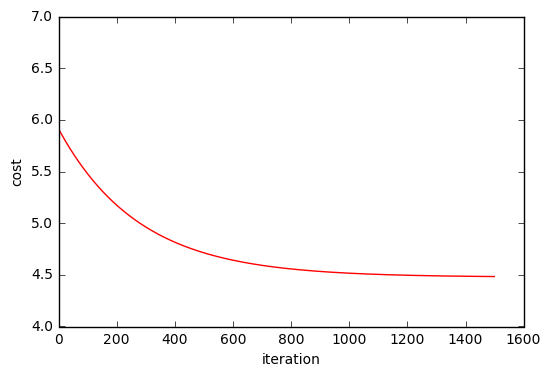

Visualizing J(theta_0, theta_1) ...



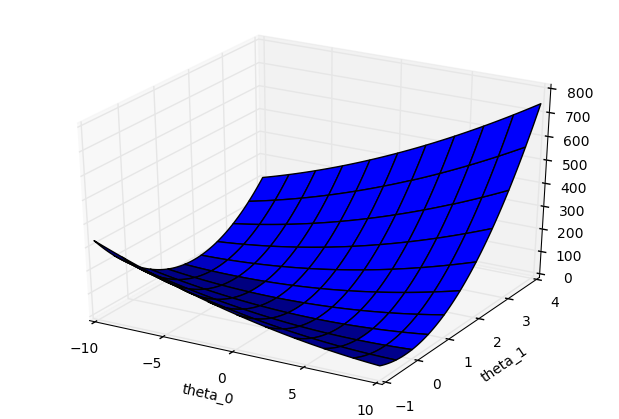

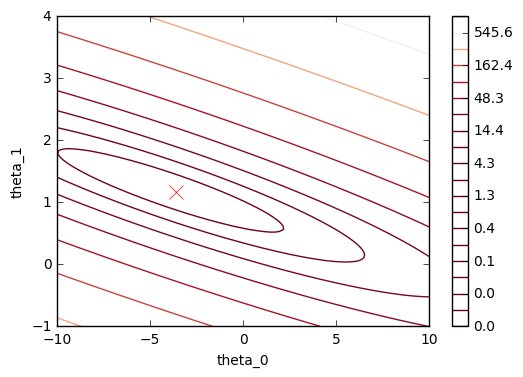

In [5]:
plt.figure(2) #new window
plt.plot(np.arange(0,iterations), J_history, linestyle='solid', color='red')
plt.xlabel("iteration")
plt.ylabel("cost")


plt.show(block = False)

print("Visualizing J(theta_0, theta_1) ...\n")

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

#initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta0_vals.size))

#Fill out J_vals
for i in range (theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t)


#Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T
#Surface plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
A,B = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(A, B, J_vals)
plt.xlabel('theta_0') 
plt.ylabel('theta_1')
plt.show(block=False)

#Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.figure(4)
plt.contour(A, B, J_vals, np.logspace(-2, 3, 20), cmap='RdGy')
plt.colorbar()
plt.xlabel('theta_0') 
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], linestyle='None', color='red', marker='x', markersize=10, label="Optimum value of theta")
plt.draw()
plt.show(block=False)